In [215]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [216]:
df1 = pd.read_csv('out.csv',index_col=0)
df2 = pd.read_json('color_palettes.json', orient='index')

In [217]:
df1.head()

,pttrn_type,sleeve_type,image_id,style,color,neckline,sleeve_length,season,material,fabric,sheer,fit_type,placket_type,price,avg_rating,no_of_reviews,date_of_firstrev
1457,Striped,NaN,1458,Basics,Blue,Collar,Long Sleeve,Spring/Fall,NaN,NaN,NaN,Regular Fit,NaN,"\r\n ₹1,146\r\n",4.7,2202,2015-11-30
1882,Geometric,NaN,1883,Boho,Multicolor,Round Neck,Short Sleeve,Summer,NaN,NaN,NaN,Regular Fit,NaN,"\r\n ₹1,510\r\n",4.8,2473,2015-4-16
1566,Colorblock,NaN,1567,Casual,Black,Boat Neck,Long Sleeve,Spring/Fall,NaN,High Stretch,NaN,Regular Fit,NaN,\r\n ₹707\r\n,4.6,1248,2015-8-21
234,Plain,NaN,235,Sexy,Black,Off the Shoulder,Long Sleeve,Spring/Fall,NaN,High Stretch,NaN,Slim Fit,Pullovers,\r\n ₹668\r\n,4.9,741,2016-10-12
1138,Polka Dot,Batwing Sleeve,1139,Casual,Black and White,Boat Neck,Long Sleeve,Spring/Fall,NaN,Non-stretch,NaN,Oversized,Pullovers,"\r\n ₹1,337\r\n",4.8,1668,2016-3-22


In [218]:
df2.head()

,0,1,2
1.png,"[183.0, 193.0, 174.0]","[134.0, 148.0, 118.0]","[221.0, 224.0, 215.0]"
10.png,"[116.0, 23.0, 26.0]","[229.0, 205.0, 192.0]","[172.0, 108.0, 98.0]"
100.png,"[238.0, 231.0, 218.0]","[119.0, 83.0, 37.0]","[191.0, 153.0, 68.0]"
1000.png,"[130.0, 121.0, 114.0]","[182.0, 194.0, 201.0]","[143.0, 160.0, 170.0]"
1001.png,"[220.0, 209.0, 195.0]","[189.0, 149.0, 121.0]","[249.0, 243.0, 233.0]"


In [219]:
# rename columns
df2 = df2.reset_index()
df2 = df2.rename(columns={'index': 'image_id', 0: 'Color_1', 1:'Color_2', 2:'Color_3'})

In [220]:
df2.head()

,image_id,Color_1,Color_2,Color_3
0,1.png,"[183.0, 193.0, 174.0]","[134.0, 148.0, 118.0]","[221.0, 224.0, 215.0]"
1,10.png,"[116.0, 23.0, 26.0]","[229.0, 205.0, 192.0]","[172.0, 108.0, 98.0]"
2,100.png,"[238.0, 231.0, 218.0]","[119.0, 83.0, 37.0]","[191.0, 153.0, 68.0]"
3,1000.png,"[130.0, 121.0, 114.0]","[182.0, 194.0, 201.0]","[143.0, 160.0, 170.0]"
4,1001.png,"[220.0, 209.0, 195.0]","[189.0, 149.0, 121.0]","[249.0, 243.0, 233.0]"


In [221]:
df2['R1'] = [i[0] for i in df2['Color_1']]
df2['G1'] = [i[1] for i in df2['Color_1']]
df2['B1'] = [i[2] for i in df2['Color_1']]
df2['R2'] = [i[0] for i in df2['Color_2']]
df2['G2'] = [i[1] for i in df2['Color_2']]
df2['B2'] = [i[2] for i in df2['Color_2']]

In [222]:
df2.head()

,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2
0,1.png,"[183.0, 193.0, 174.0]","[134.0, 148.0, 118.0]","[221.0, 224.0, 215.0]",183.0,193.0,174.0,134.0,148.0,118.0
1,10.png,"[116.0, 23.0, 26.0]","[229.0, 205.0, 192.0]","[172.0, 108.0, 98.0]",116.0,23.0,26.0,229.0,205.0,192.0
2,100.png,"[238.0, 231.0, 218.0]","[119.0, 83.0, 37.0]","[191.0, 153.0, 68.0]",238.0,231.0,218.0,119.0,83.0,37.0
3,1000.png,"[130.0, 121.0, 114.0]","[182.0, 194.0, 201.0]","[143.0, 160.0, 170.0]",130.0,121.0,114.0,182.0,194.0,201.0
4,1001.png,"[220.0, 209.0, 195.0]","[189.0, 149.0, 121.0]","[249.0, 243.0, 233.0]",220.0,209.0,195.0,189.0,149.0,121.0


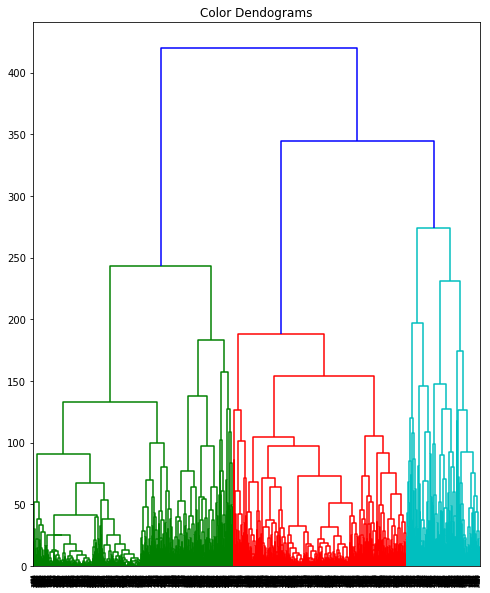

In [223]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

data = df2.iloc[:, 4:7].values
plt.figure(figsize=(8, 10))
plt.title("Color Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='complete'))

In [224]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
n_col = cluster.fit_predict(data)

In [225]:
df2['cluster_C1'] = n_col

In [226]:
df_0 = df2[df2['cluster_C1']==0]
df_0.head()

,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1
64,1056.png,"[226.0, 165.0, 89.0]","[228.0, 211.0, 191.0]","[114.0, 80.0, 55.0]",226.0,165.0,89.0,228.0,211.0,191.0,0
65,1057.png,"[182.0, 150.0, 68.0]","[206.0, 177.0, 97.0]","[148.0, 114.0, 40.0]",182.0,150.0,68.0,206.0,177.0,97.0,0
68,106.png,"[241.0, 187.0, 85.0]","[156.0, 228.0, 239.0]","[129.0, 63.0, 130.0]",241.0,187.0,85.0,156.0,228.0,239.0,0
80,1070.png,"[228.0, 239.0, 141.0]","[165.0, 170.0, 42.0]","[209.0, 224.0, 98.0]",228.0,239.0,141.0,165.0,170.0,42.0,0
85,1075.png,"[194.0, 131.0, 23.0]","[226.0, 179.0, 54.0]","[235.0, 229.0, 219.0]",194.0,131.0,23.0,226.0,179.0,54.0,0
106,1094.png,"[199.0, 141.0, 36.0]","[238.0, 182.0, 70.0]","[104.0, 73.0, 40.0]",199.0,141.0,36.0,238.0,182.0,70.0,0
142,1126.png,"[216.0, 186.0, 101.0]","[239.0, 218.0, 135.0]","[158.0, 111.0, 44.0]",216.0,186.0,101.0,239.0,218.0,135.0,0
163,1145.png,"[127.0, 166.0, 37.0]","[46.0, 43.0, 42.0]","[222.0, 196.0, 160.0]",127.0,166.0,37.0,46.0,43.0,42.0,0
166,1148.png,"[204.0, 220.0, 98.0]","[96.0, 91.0, 95.0]","[47.0, 42.0, 42.0]",204.0,220.0,98.0,96.0,91.0,95.0,0
191,1170.png,"[204.0, 190.0, 36.0]","[218.0, 211.0, 61.0]","[234.0, 212.0, 171.0]",204.0,190.0,36.0,218.0,211.0,61.0,0


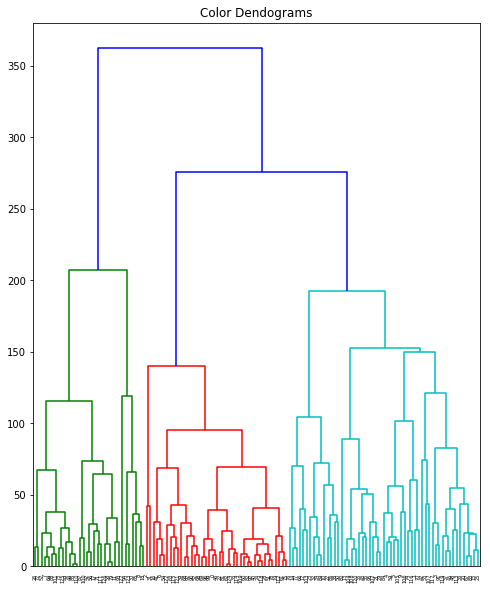

In [227]:
data = df_0.iloc[:, 7:10].values
plt.figure(figsize=(8, 10))
plt.title("Color Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='complete'))

In [228]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
n_col = cluster.fit_predict(data)

In [229]:
df_0['cluster_C2'] = n_col
df_0.head()

C:\Users\ARCHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1,cluster_C2
64,1056.png,"[226.0, 165.0, 89.0]","[228.0, 211.0, 191.0]","[114.0, 80.0, 55.0]",226.0,165.0,89.0,228.0,211.0,191.0,0,2
65,1057.png,"[182.0, 150.0, 68.0]","[206.0, 177.0, 97.0]","[148.0, 114.0, 40.0]",182.0,150.0,68.0,206.0,177.0,97.0,0,0
68,106.png,"[241.0, 187.0, 85.0]","[156.0, 228.0, 239.0]","[129.0, 63.0, 130.0]",241.0,187.0,85.0,156.0,228.0,239.0,0,2
80,1070.png,"[228.0, 239.0, 141.0]","[165.0, 170.0, 42.0]","[209.0, 224.0, 98.0]",228.0,239.0,141.0,165.0,170.0,42.0,0,0
85,1075.png,"[194.0, 131.0, 23.0]","[226.0, 179.0, 54.0]","[235.0, 229.0, 219.0]",194.0,131.0,23.0,226.0,179.0,54.0,0,0


In [230]:
df_1 = df2[df2['cluster_C1']==1]
df_1.head()

,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1
3,1000.png,"[130.0, 121.0, 114.0]","[182.0, 194.0, 201.0]","[143.0, 160.0, 170.0]",130.0,121.0,114.0,182.0,194.0,201.0,1
7,1004.png,"[119.0, 118.0, 94.0]","[198.0, 193.0, 190.0]","[150.0, 155.0, 133.0]",119.0,118.0,94.0,198.0,193.0,190.0,1
18,1014.png,"[131.0, 109.0, 103.0]","[46.0, 36.0, 32.0]","[203.0, 187.0, 180.0]",131.0,109.0,103.0,46.0,36.0,32.0,1
20,1016.png,"[115.0, 81.0, 75.0]","[197.0, 175.0, 167.0]","[61.0, 31.0, 29.0]",115.0,81.0,75.0,197.0,175.0,167.0,1
23,1019.png,"[45.0, 94.0, 47.0]","[206.0, 218.0, 192.0]","[121.0, 144.0, 109.0]",45.0,94.0,47.0,206.0,218.0,192.0,1


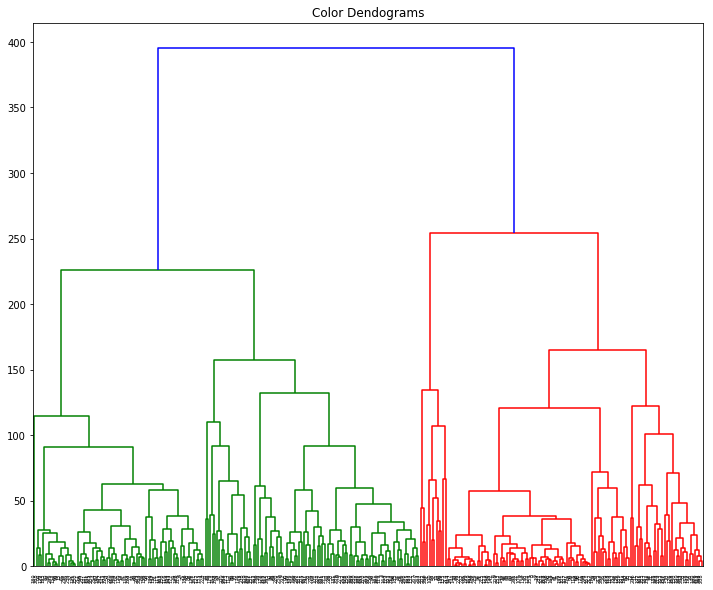

In [231]:
data = df_1.iloc[:, 7:10].values
plt.figure(figsize=(12, 10))
plt.title("Color Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='complete'))

In [232]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
n_col = cluster.fit_predict(data)

In [233]:
df_1['cluster_C2'] = n_col
df_1.head()

C:\Users\ARCHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1,cluster_C2
3,1000.png,"[130.0, 121.0, 114.0]","[182.0, 194.0, 201.0]","[143.0, 160.0, 170.0]",130.0,121.0,114.0,182.0,194.0,201.0,1,2
7,1004.png,"[119.0, 118.0, 94.0]","[198.0, 193.0, 190.0]","[150.0, 155.0, 133.0]",119.0,118.0,94.0,198.0,193.0,190.0,1,3
18,1014.png,"[131.0, 109.0, 103.0]","[46.0, 36.0, 32.0]","[203.0, 187.0, 180.0]",131.0,109.0,103.0,46.0,36.0,32.0,1,4
20,1016.png,"[115.0, 81.0, 75.0]","[197.0, 175.0, 167.0]","[61.0, 31.0, 29.0]",115.0,81.0,75.0,197.0,175.0,167.0,1,2
23,1019.png,"[45.0, 94.0, 47.0]","[206.0, 218.0, 192.0]","[121.0, 144.0, 109.0]",45.0,94.0,47.0,206.0,218.0,192.0,1,3


In [234]:
df_2 = df2[df2['cluster_C1']==2]
df_2.head()

,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1
0,1.png,"[183.0, 193.0, 174.0]","[134.0, 148.0, 118.0]","[221.0, 224.0, 215.0]",183.0,193.0,174.0,134.0,148.0,118.0,2
2,100.png,"[238.0, 231.0, 218.0]","[119.0, 83.0, 37.0]","[191.0, 153.0, 68.0]",238.0,231.0,218.0,119.0,83.0,37.0,2
4,1001.png,"[220.0, 209.0, 195.0]","[189.0, 149.0, 121.0]","[249.0, 243.0, 233.0]",220.0,209.0,195.0,189.0,149.0,121.0,2
5,1002.png,"[223.0, 221.0, 216.0]","[22.0, 19.0, 15.0]","[114.0, 93.0, 79.0]",223.0,221.0,216.0,22.0,19.0,15.0,2
6,1003.png,"[223.0, 180.0, 168.0]","[170.0, 120.0, 107.0]","[232.0, 227.0, 222.0]",223.0,180.0,168.0,170.0,120.0,107.0,2


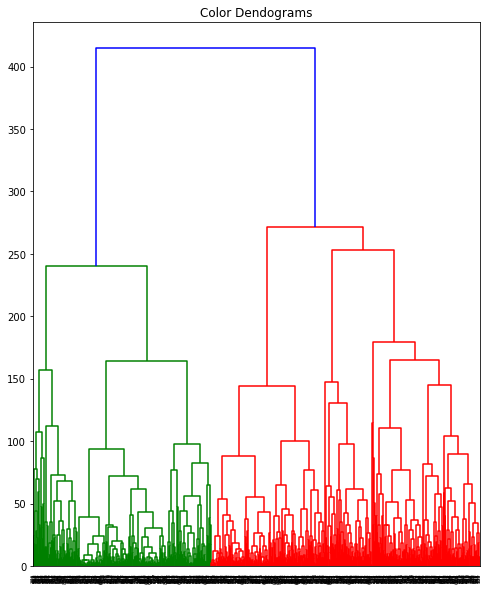

In [235]:
data = df_2.iloc[:, 7:10].values
plt.figure(figsize=(8, 10))
plt.title("Color Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='complete'))

In [236]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
n_col = cluster.fit_predict(data)

In [237]:
df_2['cluster_C2'] = n_col
df_2.head()

C:\Users\ARCHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1,cluster_C2
0,1.png,"[183.0, 193.0, 174.0]","[134.0, 148.0, 118.0]","[221.0, 224.0, 215.0]",183.0,193.0,174.0,134.0,148.0,118.0,2,0
2,100.png,"[238.0, 231.0, 218.0]","[119.0, 83.0, 37.0]","[191.0, 153.0, 68.0]",238.0,231.0,218.0,119.0,83.0,37.0,2,4
4,1001.png,"[220.0, 209.0, 195.0]","[189.0, 149.0, 121.0]","[249.0, 243.0, 233.0]",220.0,209.0,195.0,189.0,149.0,121.0,2,0
5,1002.png,"[223.0, 221.0, 216.0]","[22.0, 19.0, 15.0]","[114.0, 93.0, 79.0]",223.0,221.0,216.0,22.0,19.0,15.0,2,1
6,1003.png,"[223.0, 180.0, 168.0]","[170.0, 120.0, 107.0]","[232.0, 227.0, 222.0]",223.0,180.0,168.0,170.0,120.0,107.0,2,0


In [250]:
df_3 = df2[df2['cluster_C1']==3]
df_3.head()

,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1
22,1018.png,"[199.0, 146.0, 135.0]","[136.0, 84.0, 75.0]","[230.0, 211.0, 200.0]",199.0,146.0,135.0,136.0,84.0,75.0,3
72,1063.png,"[182.0, 151.0, 137.0]","[224.0, 201.0, 187.0]","[126.0, 91.0, 79.0]",182.0,151.0,137.0,224.0,201.0,187.0,3
84,1074.png,"[216.0, 154.0, 112.0]","[189.0, 31.0, 17.0]","[129.0, 34.0, 16.0]",216.0,154.0,112.0,189.0,31.0,17.0,3
87,1077.png,"[198.0, 165.0, 128.0]","[36.0, 25.0, 17.0]","[123.0, 90.0, 66.0]",198.0,165.0,128.0,36.0,25.0,17.0,3
92,1081.png,"[196.0, 181.0, 132.0]","[115.0, 121.0, 97.0]","[35.0, 22.0, 28.0]",196.0,181.0,132.0,115.0,121.0,97.0,3


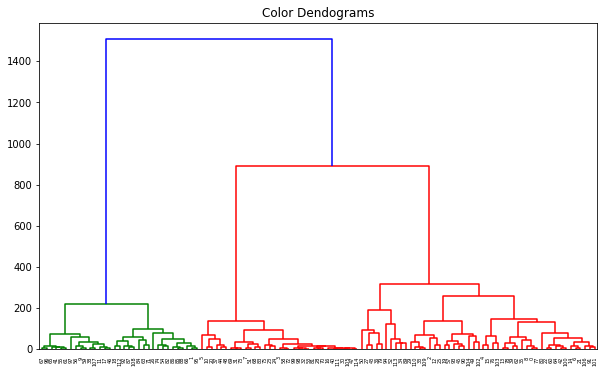

In [254]:
data = df_3.iloc[:, 7:10].values
plt.figure(figsize=(10, 6))
plt.title("Color Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [255]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
n_col = cluster.fit_predict(data)

In [256]:
df_3['cluster_C2'] = n_col
df_3.head()

C:\Users\ARCHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1,cluster_C2
22,1018.png,"[199.0, 146.0, 135.0]","[136.0, 84.0, 75.0]","[230.0, 211.0, 200.0]",199.0,146.0,135.0,136.0,84.0,75.0,3,0
72,1063.png,"[182.0, 151.0, 137.0]","[224.0, 201.0, 187.0]","[126.0, 91.0, 79.0]",182.0,151.0,137.0,224.0,201.0,187.0,3,1
84,1074.png,"[216.0, 154.0, 112.0]","[189.0, 31.0, 17.0]","[129.0, 34.0, 16.0]",216.0,154.0,112.0,189.0,31.0,17.0,3,0
87,1077.png,"[198.0, 165.0, 128.0]","[36.0, 25.0, 17.0]","[123.0, 90.0, 66.0]",198.0,165.0,128.0,36.0,25.0,17.0,3,2
92,1081.png,"[196.0, 181.0, 132.0]","[115.0, 121.0, 97.0]","[35.0, 22.0, 28.0]",196.0,181.0,132.0,115.0,121.0,97.0,3,0


In [258]:
df_4 = df2[df2['cluster_C1']==4]
df_4.head()

,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1
1,10.png,"[116.0, 23.0, 26.0]","[229.0, 205.0, 192.0]","[172.0, 108.0, 98.0]",116.0,23.0,26.0,229.0,205.0,192.0,4
10,1007.png,"[26.0, 26.0, 26.0]","[127.0, 120.0, 115.0]","[211.0, 210.0, 206.0]",26.0,26.0,26.0,127.0,120.0,115.0,4
12,1009.png,"[54.0, 6.0, 15.0]","[225.0, 217.0, 214.0]","[95.0, 23.0, 38.0]",54.0,6.0,15.0,225.0,217.0,214.0,4
16,1012.png,"[27.0, 25.0, 25.0]","[200.0, 197.0, 192.0]","[89.0, 86.0, 84.0]",27.0,25.0,25.0,200.0,197.0,192.0,4
17,1013.png,"[67.0, 62.0, 42.0]","[229.0, 214.0, 197.0]","[165.0, 142.0, 120.0]",67.0,62.0,42.0,229.0,214.0,197.0,4


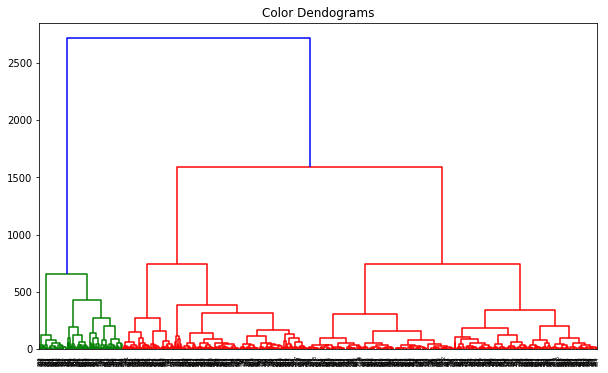

In [262]:
data = df_4.iloc[:, 7:10].values
plt.figure(figsize=(10, 6))
plt.title("Color Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [263]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
n_col = cluster.fit_predict(data)

In [264]:
df_4['cluster_C2'] = n_col
df_4.head()

C:\Users\ARCHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1,cluster_C2
1,10.png,"[116.0, 23.0, 26.0]","[229.0, 205.0, 192.0]","[172.0, 108.0, 98.0]",116.0,23.0,26.0,229.0,205.0,192.0,4,3
10,1007.png,"[26.0, 26.0, 26.0]","[127.0, 120.0, 115.0]","[211.0, 210.0, 206.0]",26.0,26.0,26.0,127.0,120.0,115.0,4,4
12,1009.png,"[54.0, 6.0, 15.0]","[225.0, 217.0, 214.0]","[95.0, 23.0, 38.0]",54.0,6.0,15.0,225.0,217.0,214.0,4,3
16,1012.png,"[27.0, 25.0, 25.0]","[200.0, 197.0, 192.0]","[89.0, 86.0, 84.0]",27.0,25.0,25.0,200.0,197.0,192.0,4,3
17,1013.png,"[67.0, 62.0, 42.0]","[229.0, 214.0, 197.0]","[165.0, 142.0, 120.0]",67.0,62.0,42.0,229.0,214.0,197.0,4,3


In [266]:
df_5 = df2[df2['cluster_C1']==5]
df_5.head()

,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1
15,1011.png,"[188.0, 66.0, 77.0]","[238.0, 184.0, 188.0]","[216.0, 125.0, 133.0]",188.0,66.0,77.0,238.0,184.0,188.0,5
19,1015.png,"[165.0, 109.0, 50.0]","[186.0, 176.0, 160.0]","[80.0, 74.0, 65.0]",165.0,109.0,50.0,186.0,176.0,160.0,5
71,1062.png,"[134.0, 27.0, 48.0]","[219.0, 160.0, 126.0]","[93.0, 17.0, 28.0]",134.0,27.0,48.0,219.0,160.0,126.0,5
76,1067.png,"[192.0, 80.0, 65.0]","[240.0, 217.0, 208.0]","[237.0, 122.0, 99.0]",192.0,80.0,65.0,240.0,217.0,208.0,5
78,1069.png,"[157.0, 103.0, 46.0]","[38.0, 36.0, 51.0]","[205.0, 182.0, 144.0]",157.0,103.0,46.0,38.0,36.0,51.0,5


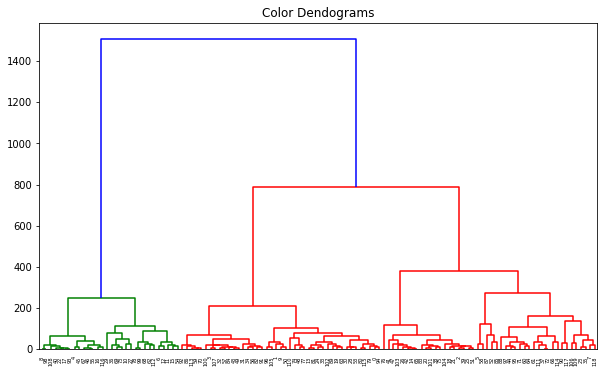

In [267]:
data = df_5.iloc[:, 7:10].values
plt.figure(figsize=(10, 6))
plt.title("Color Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [269]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
n_col = cluster.fit_predict(data)

In [270]:
df_5['cluster_C2'] = n_col
df_5.head()

C:\Users\ARCHIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,image_id,Color_1,Color_2,Color_3,R1,G1,B1,R2,G2,B2,cluster_C1,cluster_C2
15,1011.png,"[188.0, 66.0, 77.0]","[238.0, 184.0, 188.0]","[216.0, 125.0, 133.0]",188.0,66.0,77.0,238.0,184.0,188.0,5,2
19,1015.png,"[165.0, 109.0, 50.0]","[186.0, 176.0, 160.0]","[80.0, 74.0, 65.0]",165.0,109.0,50.0,186.0,176.0,160.0,5,2
71,1062.png,"[134.0, 27.0, 48.0]","[219.0, 160.0, 126.0]","[93.0, 17.0, 28.0]",134.0,27.0,48.0,219.0,160.0,126.0,5,0
76,1067.png,"[192.0, 80.0, 65.0]","[240.0, 217.0, 208.0]","[237.0, 122.0, 99.0]",192.0,80.0,65.0,240.0,217.0,208.0,5,2
78,1069.png,"[157.0, 103.0, 46.0]","[38.0, 36.0, 51.0]","[205.0, 182.0, 144.0]",157.0,103.0,46.0,38.0,36.0,51.0,5,1


In [279]:
# Concatenate all the dataframes

frames = [df_0,df_1,df_2,df_3,df_4,df_5]
df = pd.concat(frames)

In [281]:
df.drop(['Color_1', 'Color_2'], axis=1, inplace=True)

In [285]:
df.to_csv('ColorCluster.csv')